In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

# Problem setting 

Let us say we have data like this. Look how the data is presented in the default pyplot setting. There are 5 major ticks in x axis with the interval of 2, and 8 major ticks in y axis with the intervla of 2.5. 

In [2]:
x = np.arange(10, step=1) # np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.arange(20, step=2) # # np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

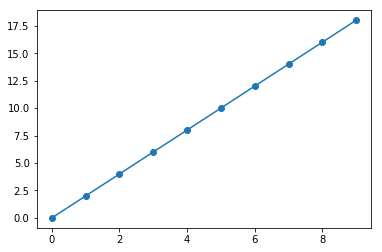

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o-')
plt.show()

Let us assume that we want to make it such that..

* **x axis**: (1) major ticks is in every 1, (2) minor ticks in every 0.2
* **y axis**: (1) major ticks is in every 2, (2) minor ticks in every 1, (3) put % next to the major tick number. i.e. 2%, 4% , .., 20%

How do we make that happen? Let us look at different tick formatting options to see what is the best solution!

# Ticks

Let us first define ticks. 

In [4]:
xticks_major = np.arange(0, 10, step=1) # np.array([0, 2, 4, 6, 8])
yticks_major = np.arange(0, 20, step=2) # np.array([ 0,  5, 10, 15])

xticks_minor = np.arange(0, 10, step=0.2) # np.array([0. , 0.5, 1. , ... , 8.5, 9. , 9.5])
yticks_minor = np.arange(0, 20, step=1) # np.array([ 0,  1,  2,  3,  ..., 17, 18, 19])

## 1. Using pyplot.xticks

The easiest way to control ticks is using plt.xticks or plt.yticks. It can set lables to ticks.

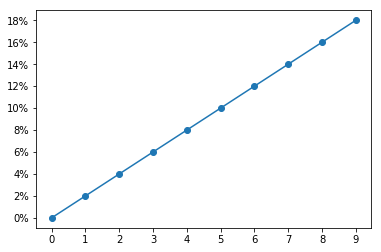

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o-')
plt.xticks(xticks_major)
plt.yticks(yticks_major, ['%d%%'%d for d in yticks_major])
plt.show()

However, the major drawback of plt.xticks is that it can't control minor ticks. Also, if we have multiple subplots, we can't control ticks of each subplot with pyplot.xticks.

## 2. Using Axes.set_xtick & Axes.set_xticklabels

A more sophisticated way to control ticks is using Axes.set_xticks. pyplot.xticks class above is also based on this. 
The details of axes.set_xticks can be found here https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels

### (1) set major ticks

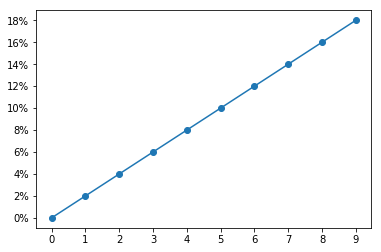

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o-')
ax.set_xticks(xticks_major)
ax.set_yticks(yticks_major)
ax.set_yticklabels(['%d%%'%d for d in yticks_major])
plt.show()

### (2) set minor ticks

There are two ways to set up minor ticks. 
* (1) Axes.minorticks_on()
* (2) Axes.xticks(ticks, minor=True)

The first option is super easy and convenient but as it automatically generates 5 minor ticks between major ticks by default, we cannot control the interval of minor ticks. To control the minor ticks, we use "minor" parameter in Axes.xticks.

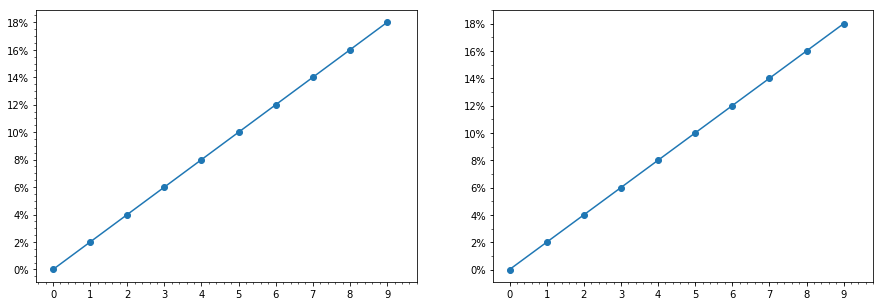

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Axes.minorticks_on() 
ax[0].plot(x, y, 'o-')
ax[0].set_xticks(xticks_major)
ax[0].set_yticks(yticks_major)
ax[0].set_xticks(xticks_minor, minor=True)
ax[0].minorticks_on() # generates 5 minor ticks between major ticks by default 
ax[0].set_yticklabels(['%d%%'%d for d in yticks_major])

# specify minor ticks 
ax[1].plot(x, y, 'o-')
ax[1].set_xticks(xticks_major)
ax[1].set_yticks(yticks_major) 
ax[1].set_xticks(xticks_minor, minor=True)
ax[1].set_yticks(yticks_minor, minor=True)
ax[1].set_yticklabels(['%d%%'%d for d in yticks_major])

plt.show()

## 3. Using ticker.MultipleLocator & ticker.FormatStrFormatter 

Another great way to do this is using MultipleLocator and FormatStrFormatter classes. 

* **MultipleLocator** is used to set up the ticks with a multiple of base. For instance, MultipleLocator(5) will give us ticks of [5, 10, 15, ...]
* **FormatStrFormatter** is used to set up a format string for each value. For instance, FormatStrFormatter('%d cm') for the MultipleLocator(5) will give us lables of [5 cm, 10 cm, 15 cm, ...] 

Look here to find details:

https://matplotlib.org/api/ticker_api.html

https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html

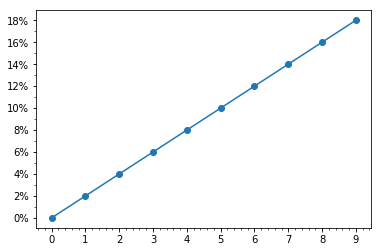

In [8]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots()
plt.plot(x, y, 'o-')

# major ticks 
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%'))

# minor ticks 
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.show()

# Plus - Grid

We can add grid to any of above solutions. Just add ax.grid and define target grid (minor/major) and the transparency if you want !

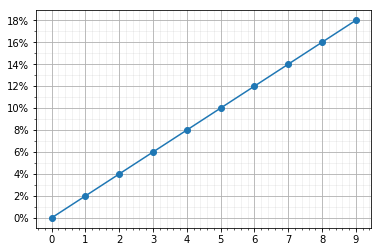

In [9]:
fig, ax = plt.subplots()
plt.plot(x, y, 'o-')

# major ticks 
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%'))

# minor ticks 
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# grid
ax.grid(True, which='major')
ax.grid(True, which='minor', alpha=0.2)

plt.show()

# Summary

We reviewed tree tick formatting solutions and here is the pros/cons of each solution. 

|                  |Pros|Cons|
|------------------|-----|-----|
|(1) pyplot.xticks |Easy. Ticks and labels can be defined in just one line of code! | Cannot control minor grid nor multiple subplots|
|(2) Axes.set_xtick & Axes.set_xticklabels| More control over ticks. More flexibility| Lengthy code. Need to set ticks and label separately for both major and minor ticks|
|(3) MultipleLocator & FormatStrFormatter | Easy when ticks are a multiple of a base. No need to worry the data min/max goes beyond the defined tick range| Less flexibility in ticks. not good for data that is not represented as a multiple of a base. e.g. datetime (You need to use FixedLocator & FixedFormatter|


In summary, I would use the **first solution** if I am dealing with a simple plot with one subplot and no need for minor ticks. If my data is simple and I just want ticks of a muliple of a number, I would use **third solution**. Other cases, I would use the **second solution**.